# Expected Length of LIS in a random permutation of distinct integers

Since $N \leq 10$ and $10!$ is small enough, we can actually just compute the LIS for all permutations and average. 

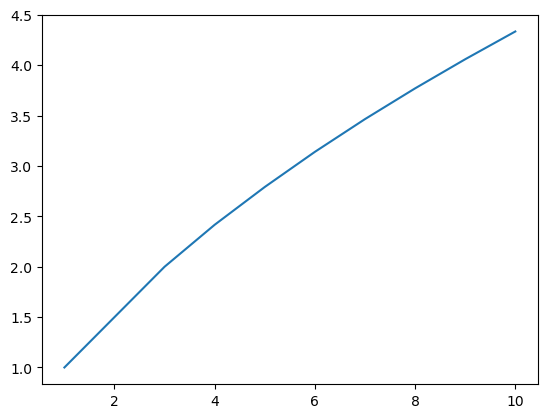

In [36]:
# We can do some simulation here to get the LIS.
from itertools import permutations
from math import factorial
from functools import cache
from fractions import Fraction
from matplotlib import pyplot as plt


def LIS(arr):
    # Basic O(n^2) LIS
    N = len(arr)
    dp = [1] * (N + 1)
    for i, x in enumerate(arr):
        for j, y in enumerate(arr[:i]):
            if y < x:
                dp[i] = max(1 + dp[j], dp[i])
    return max(dp)


@cache
def expected_LIS(N):
    # averages LIS over all N! permuations.
    arr = [x for x in range(N)]
    avg = 0
    for p in permutations(arr):
        avg += LIS(p)
    return Fraction(avg, factorial(N))


K = 11
k_vals = [k for k in range(1, K)]
E = [expected_LIS(k) for k in k_vals]


plt.plot(k_vals, E)
plt.show()

In [37]:
N1, N2 = 4, 10
ans1 = expected_LIS(N1)
ans2 = expected_LIS(N2)
print(f"For N = {N1}, we have E_{N1} = {ans1} or {ans1:.4f}")
print(f"For N = {N2}, we have E_{N2} = {ans2} or {ans2:.4f}")

For N = 4, we have E_4 = 29/12 or 2.4167
For N = 10, we have E_10 = 3146141/725760 or 4.3350
